# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot
sns.set_theme()

### Importe o dataset

In [29]:
data = pd.read_csv('beer_consumption_SP/beer_consumption.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [30]:
data.head(10)

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
5,28218,23.78
6,29732,24.00
7,28397,24.90
8,24886,28.20
9,37937,26.76


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       365 non-null    int64  
 1   X       365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


### Obtenha e avalie as estatísticas descritivas dos dados

In [32]:
data.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

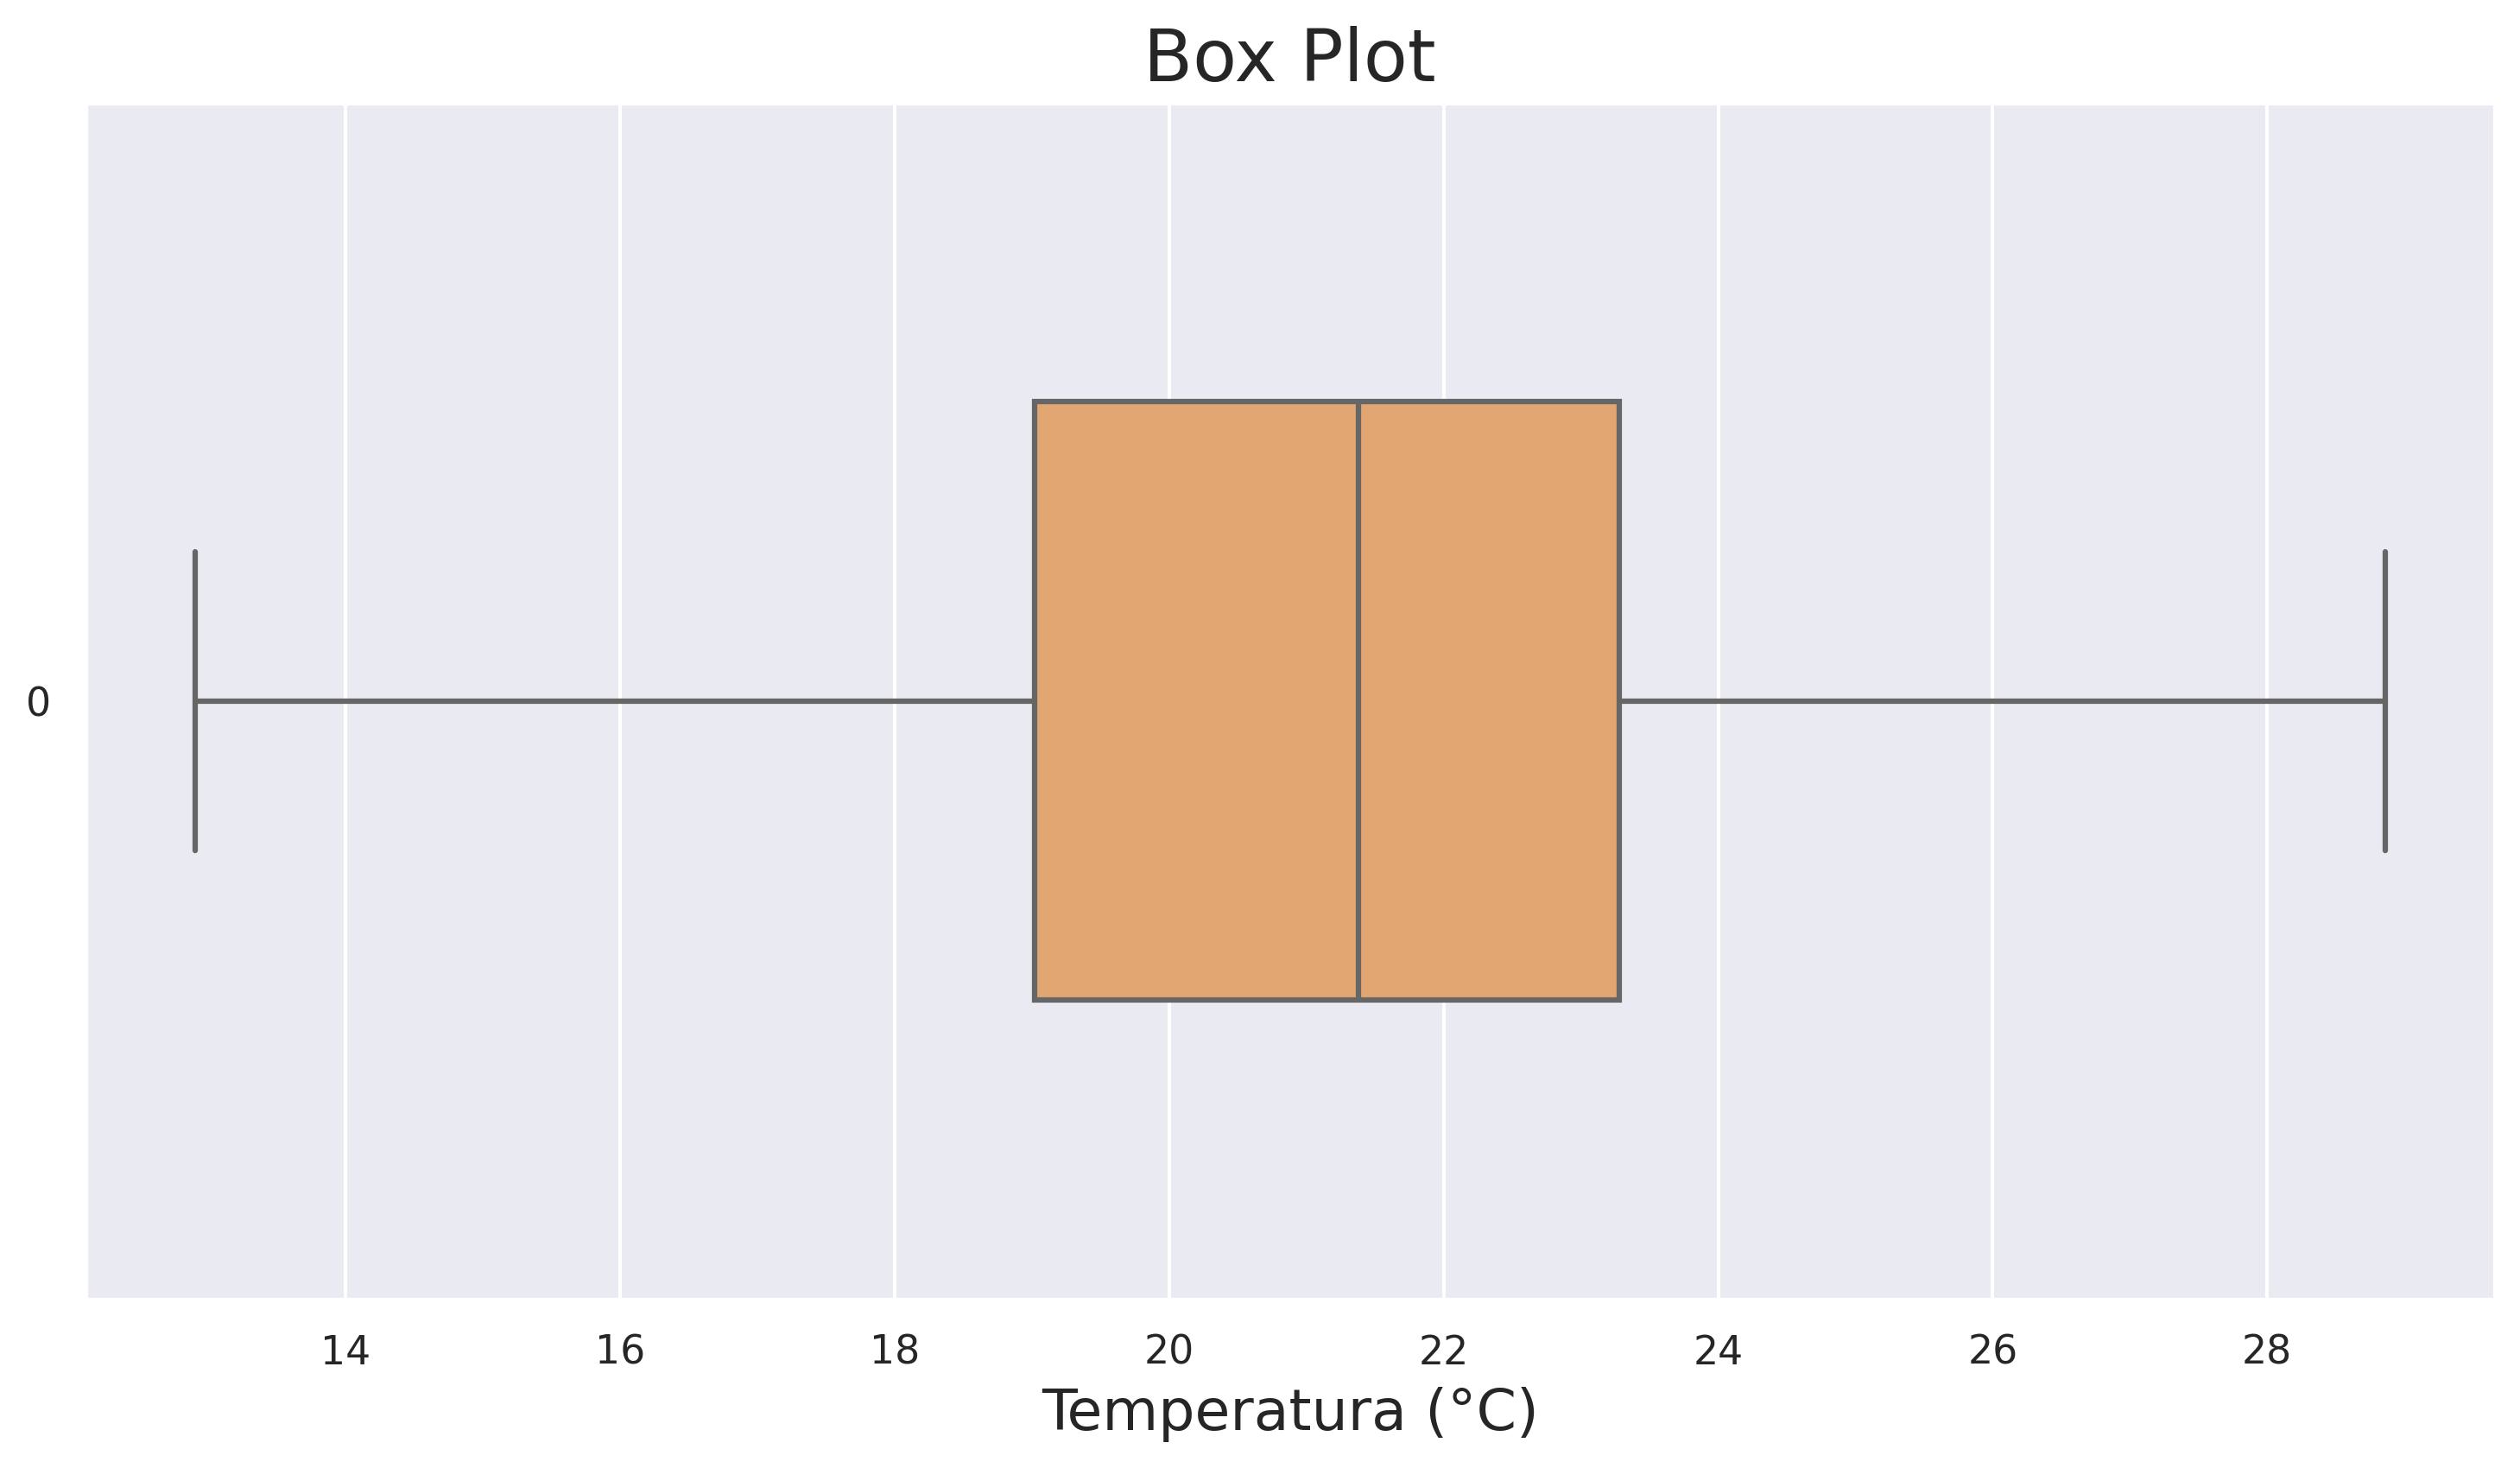

In [33]:
plt.figure(dpi=300)
ax = sns.boxplot(data=data.X, orient='h', width=0.5, color='sandybrown')
ax.figure.set_size_inches(12, 6)
ax.set_title('Box Plot', fontsize=20)
ax.set_xlabel('Temperatura (°C)', fontsize=16)
plt.show()

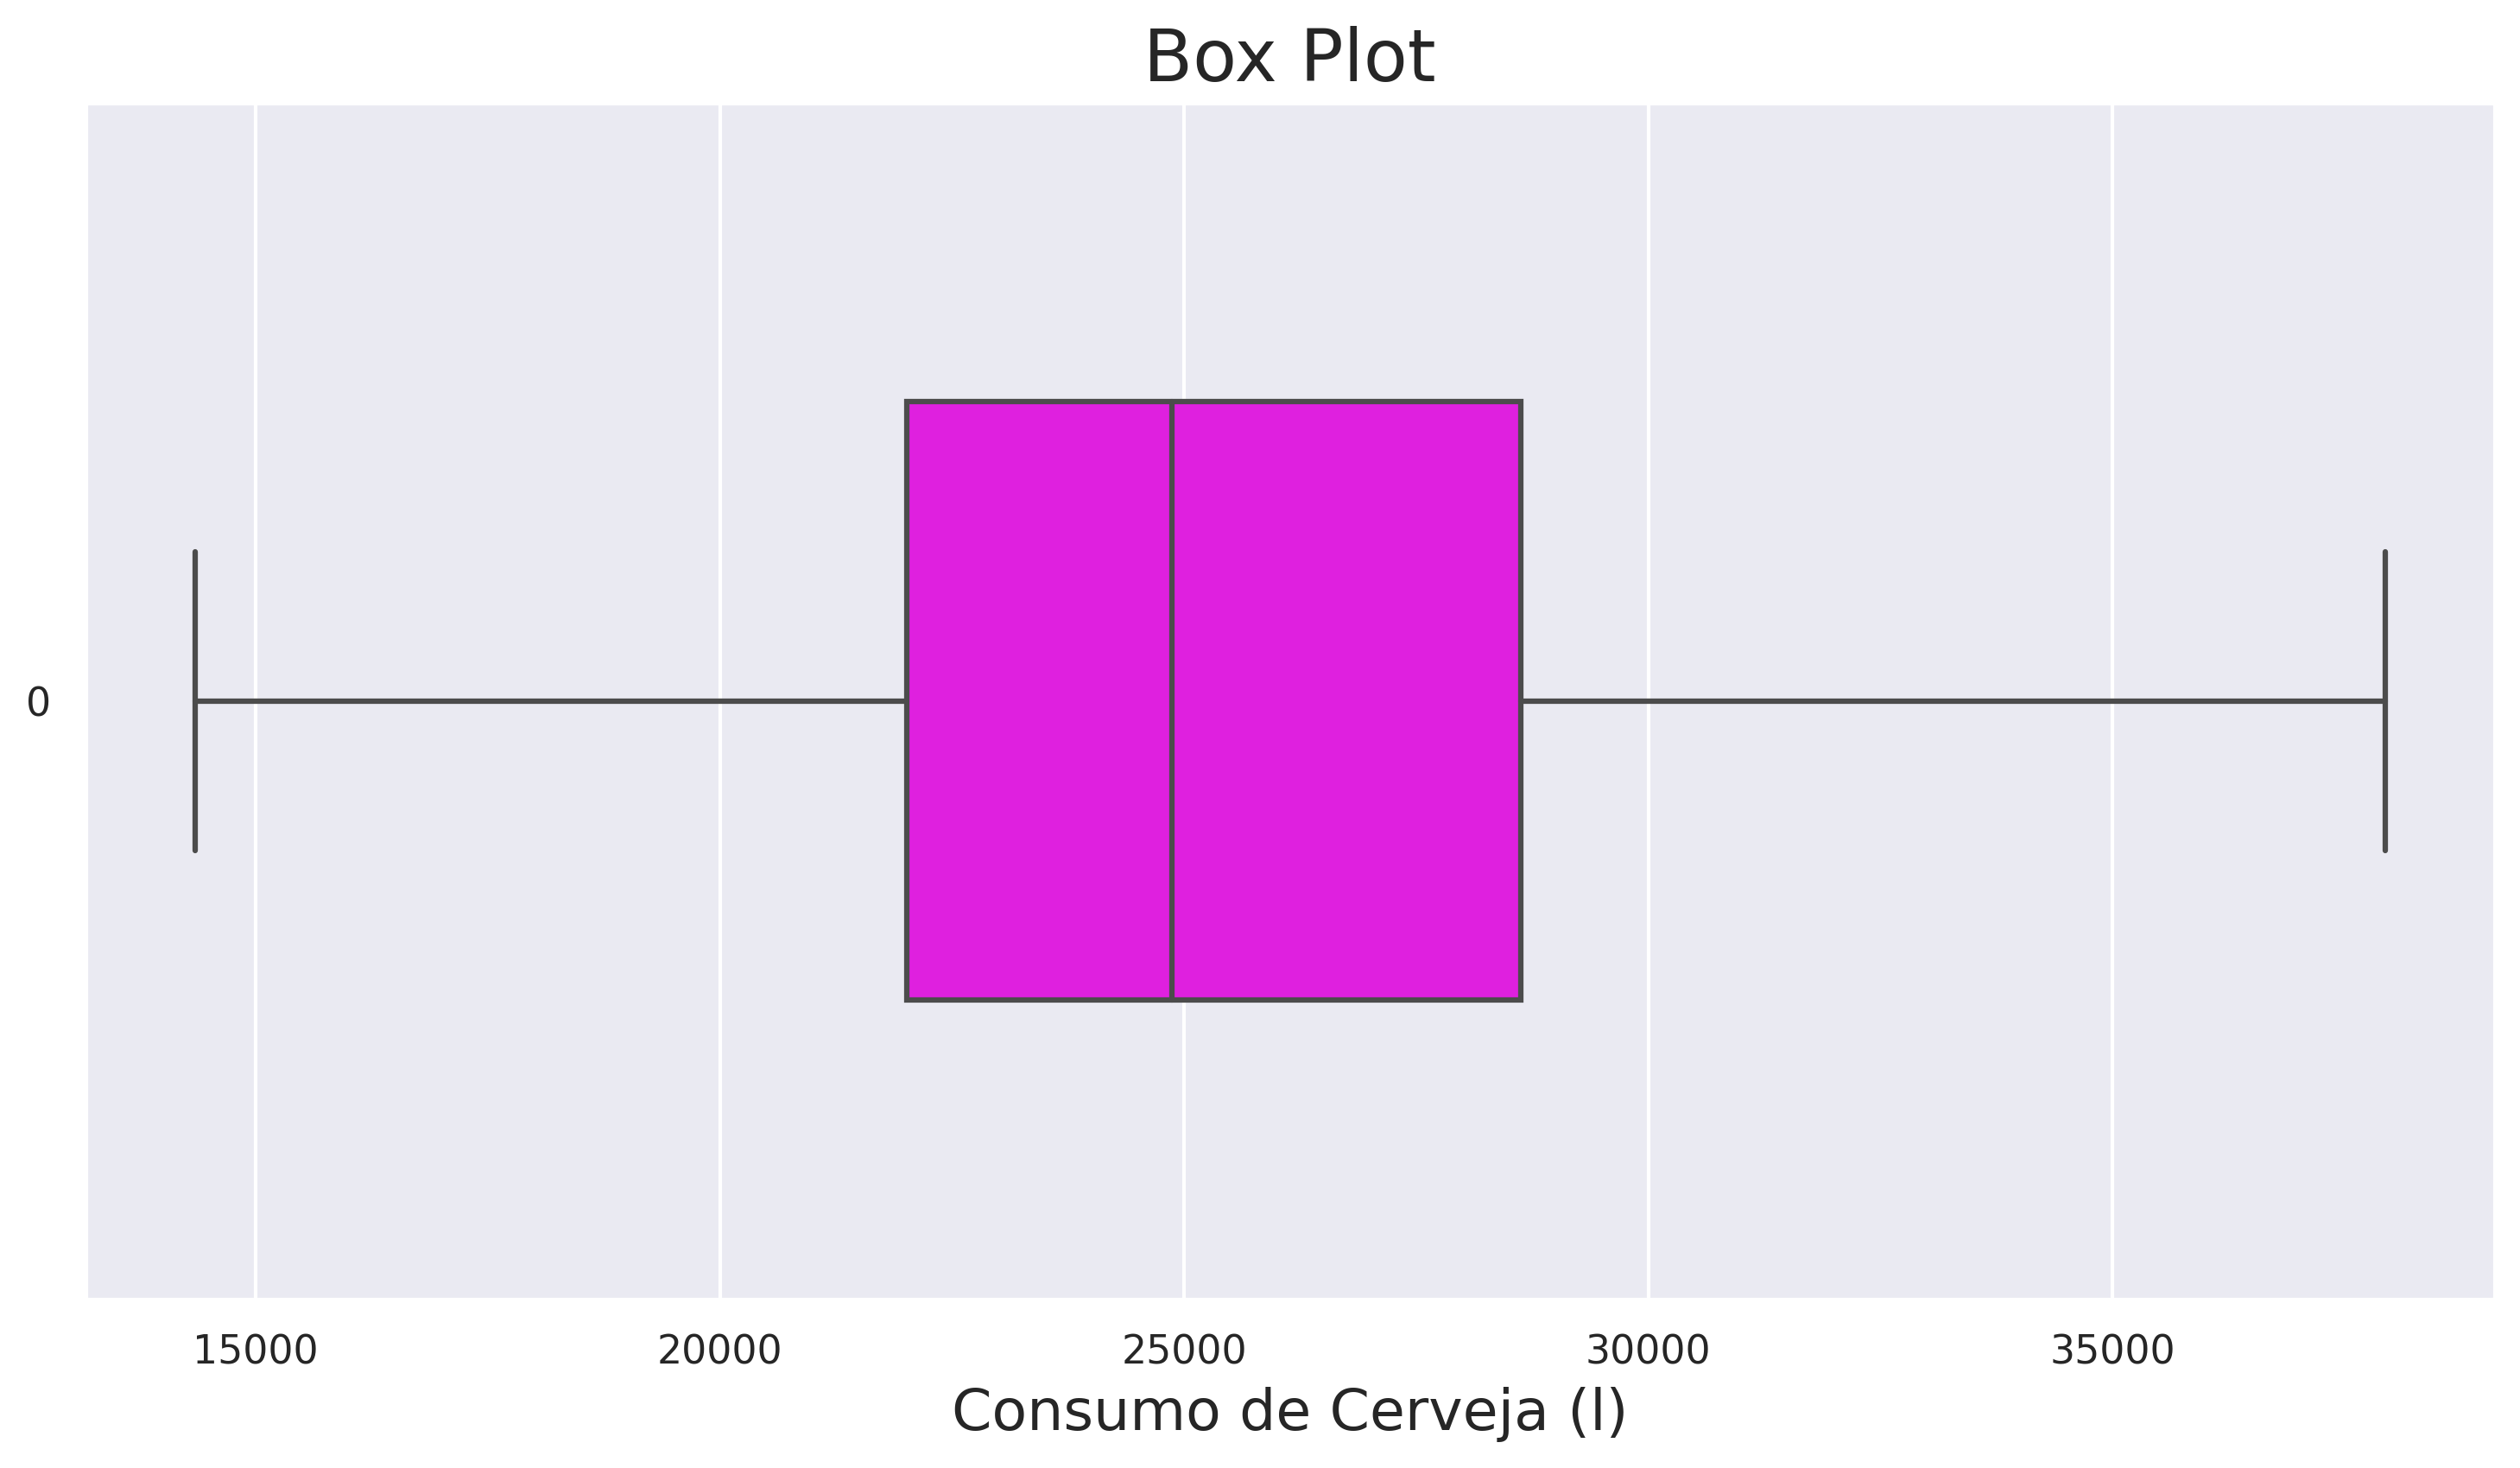

In [34]:
plt.figure(dpi=300)
ax = sns.boxplot(data=data.Y, orient='h', width=0.5, color='fuchsia')
ax.figure.set_size_inches(12, 6)
ax.set_title('Box Plot', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (l)', fontsize=16)
plt.show()

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

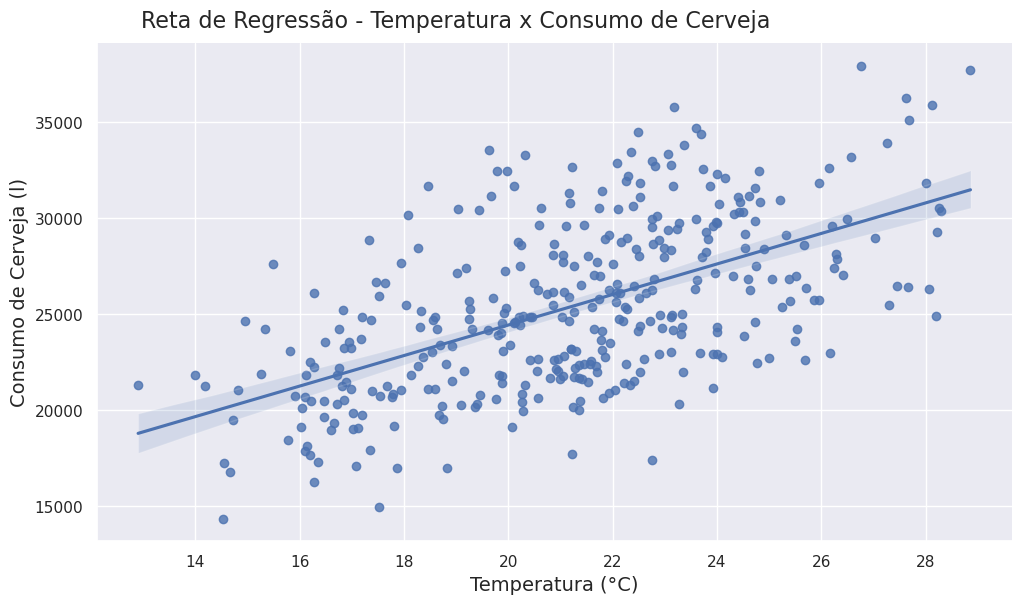

In [35]:
ax = sns.lmplot(x='X', y='Y', data=data)
ax.figure.set_size_inches(12, 6)
ax.figure.suptitle('Reta de Regressão - Temperatura x Consumo de Cerveja', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (l)', fontsize=14)
plt.show()

### <font color='red'>Utilizando a matriz de correlação</font>

In [36]:
data.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.:

É possível quantificar a intensidade dessa relação?

Resp.:

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:

### Prepare os dados para estimar um modelo de regressão linear simples

In [38]:
Y = data.Y
X = sm.add_constant(data.X)

### Estime o modelo de regressão linear simples

In [39]:
result_regression = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [40]:
print(result_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.87e-33
Time:                        11:19:47   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [41]:
data['Y_expected'] = result_regression.predict()
data

,Y,X,Y_expected
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
...,...,...,...
360,32307,24.00,27606.088172
361,26095,22.64,26525.047922
362,22309,21.68,25761.960686
363,20467,21.38,25523.495925


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [45]:
beta_1, beta_2 = result_regression.params[0], result_regression.params[1]
predict = lambda x: beta_1 + beta_2 * x

print(f'O consumo de cerveja para um dia com temperatura média de 42° C: {predict(42.0).round(2)} litros')

O consumo de cerveja para um dia com temperatura média de 42° C: 41913.97 litros


### Obtenha os resíduos da regressão

In [46]:
data['Residual'] = result_regression.resid
data.head()

,Y,X,Y_expected,Residual
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

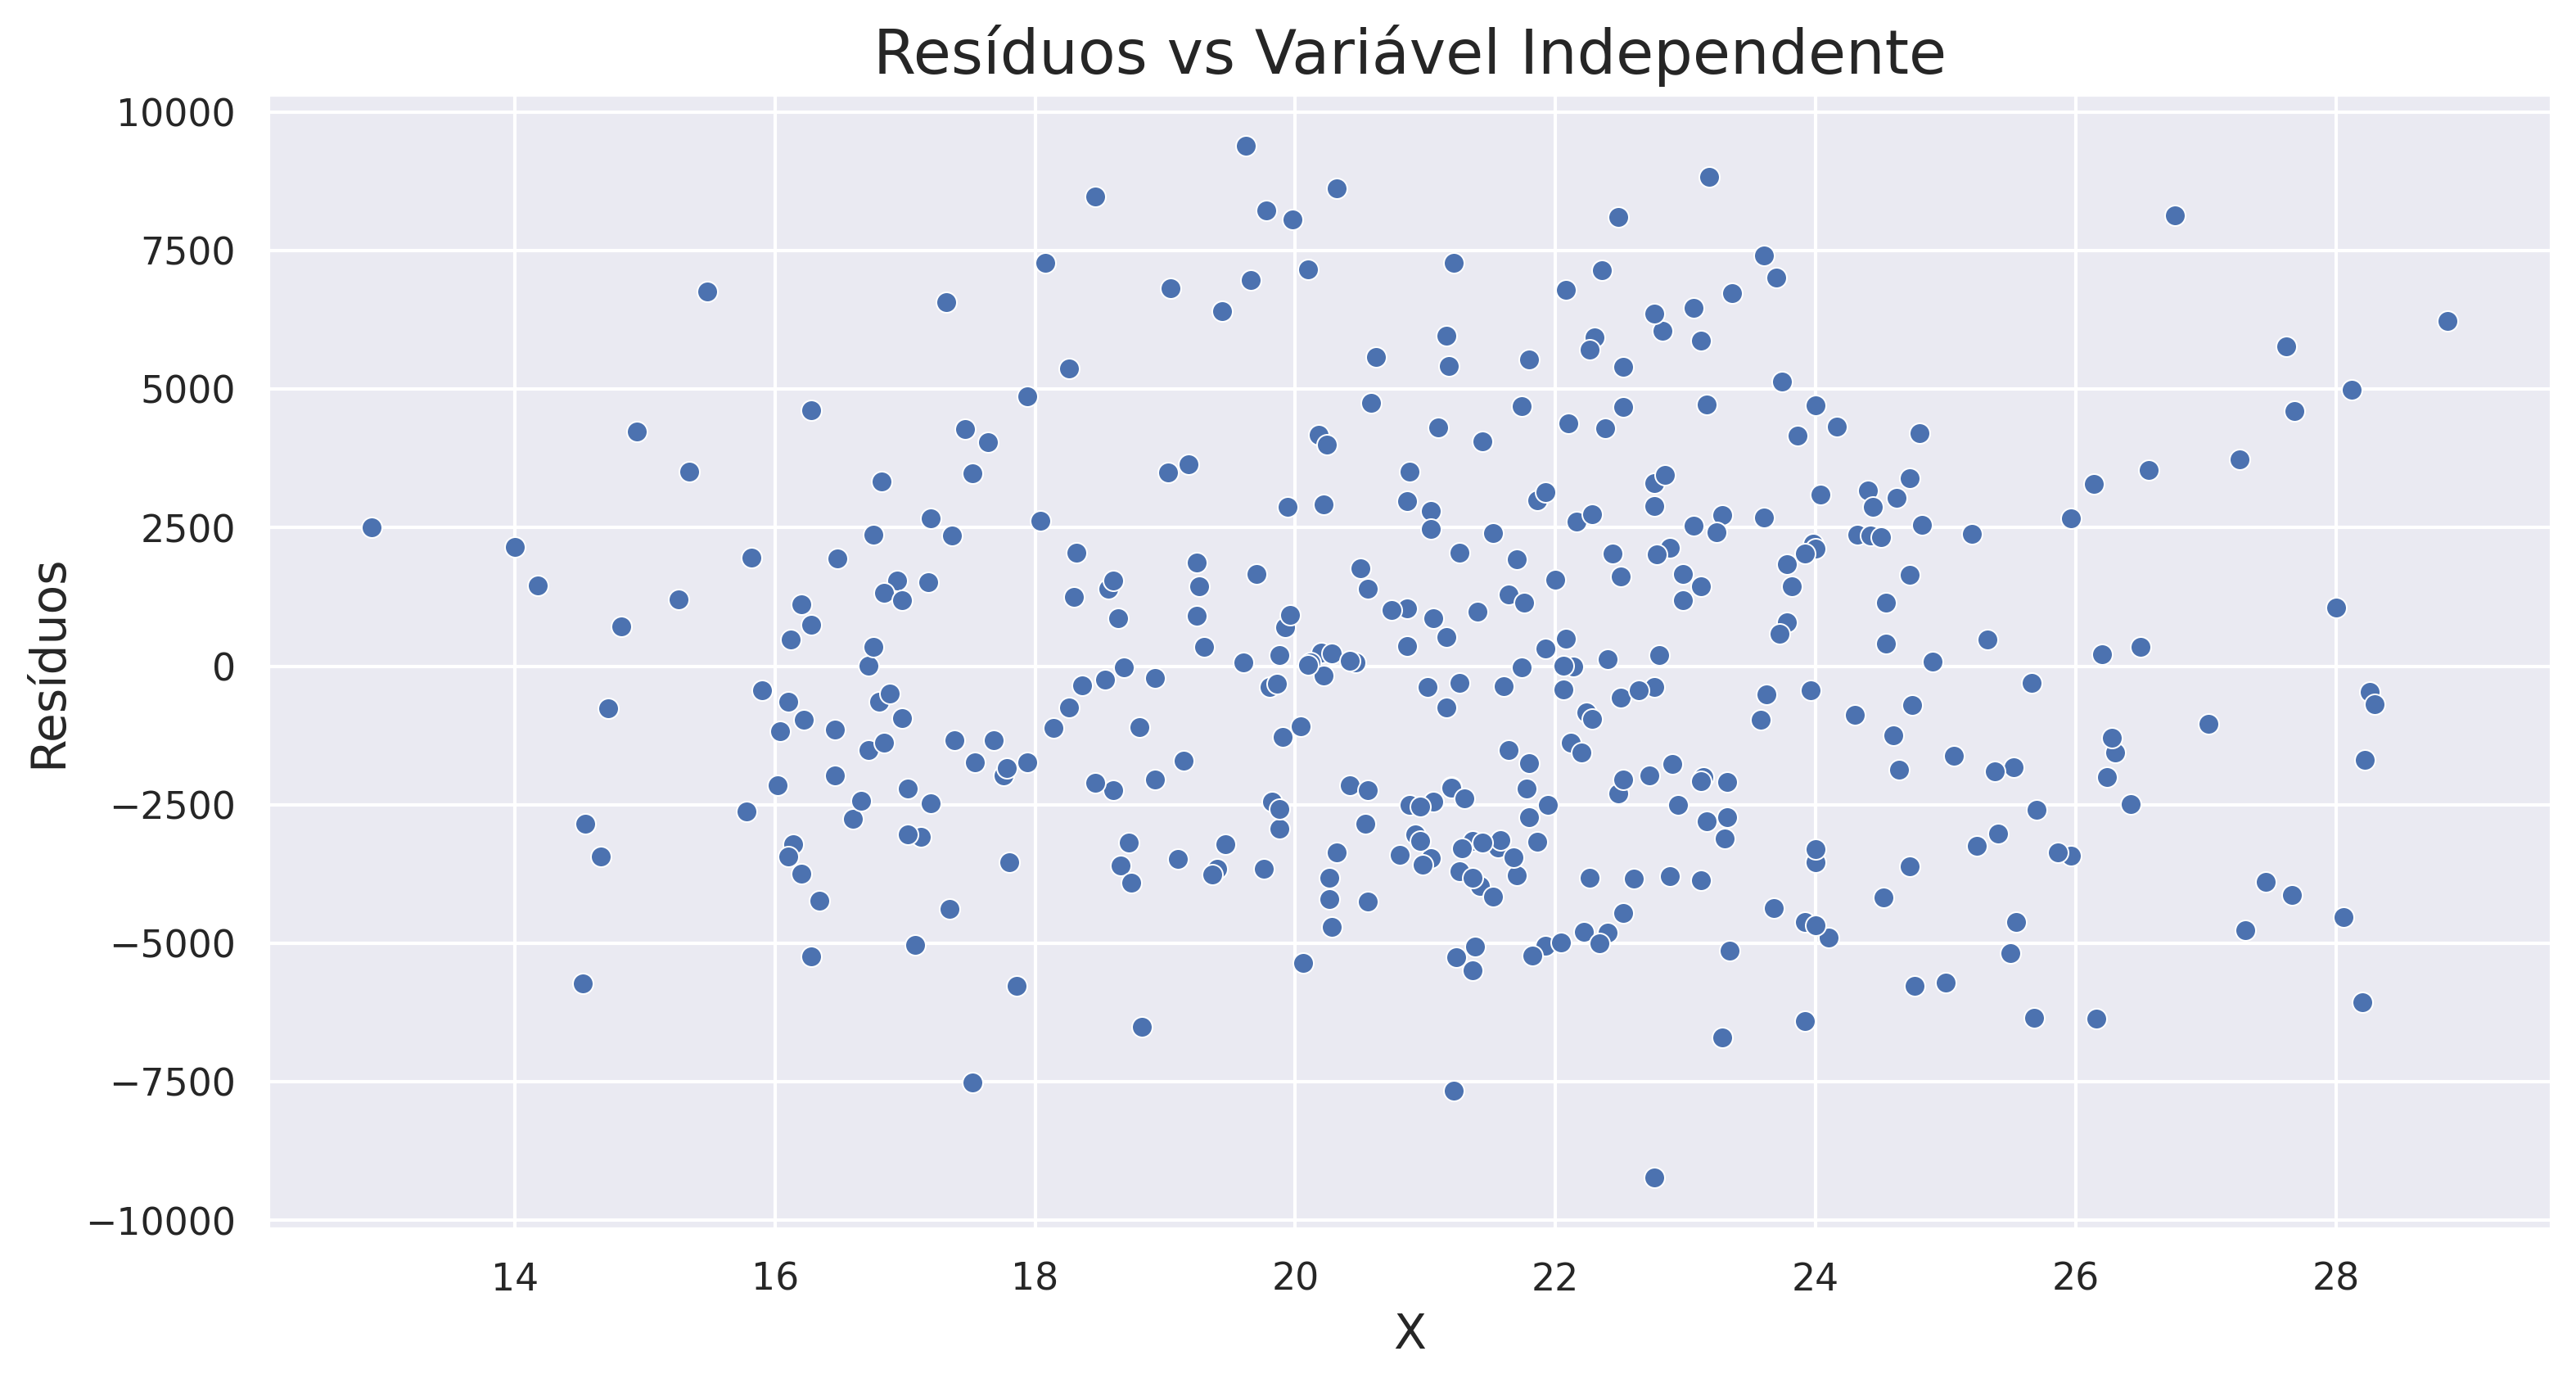

In [47]:
plt.figure(dpi=300)
ax = sns.scatterplot(x=data.X, y=data.Residual)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

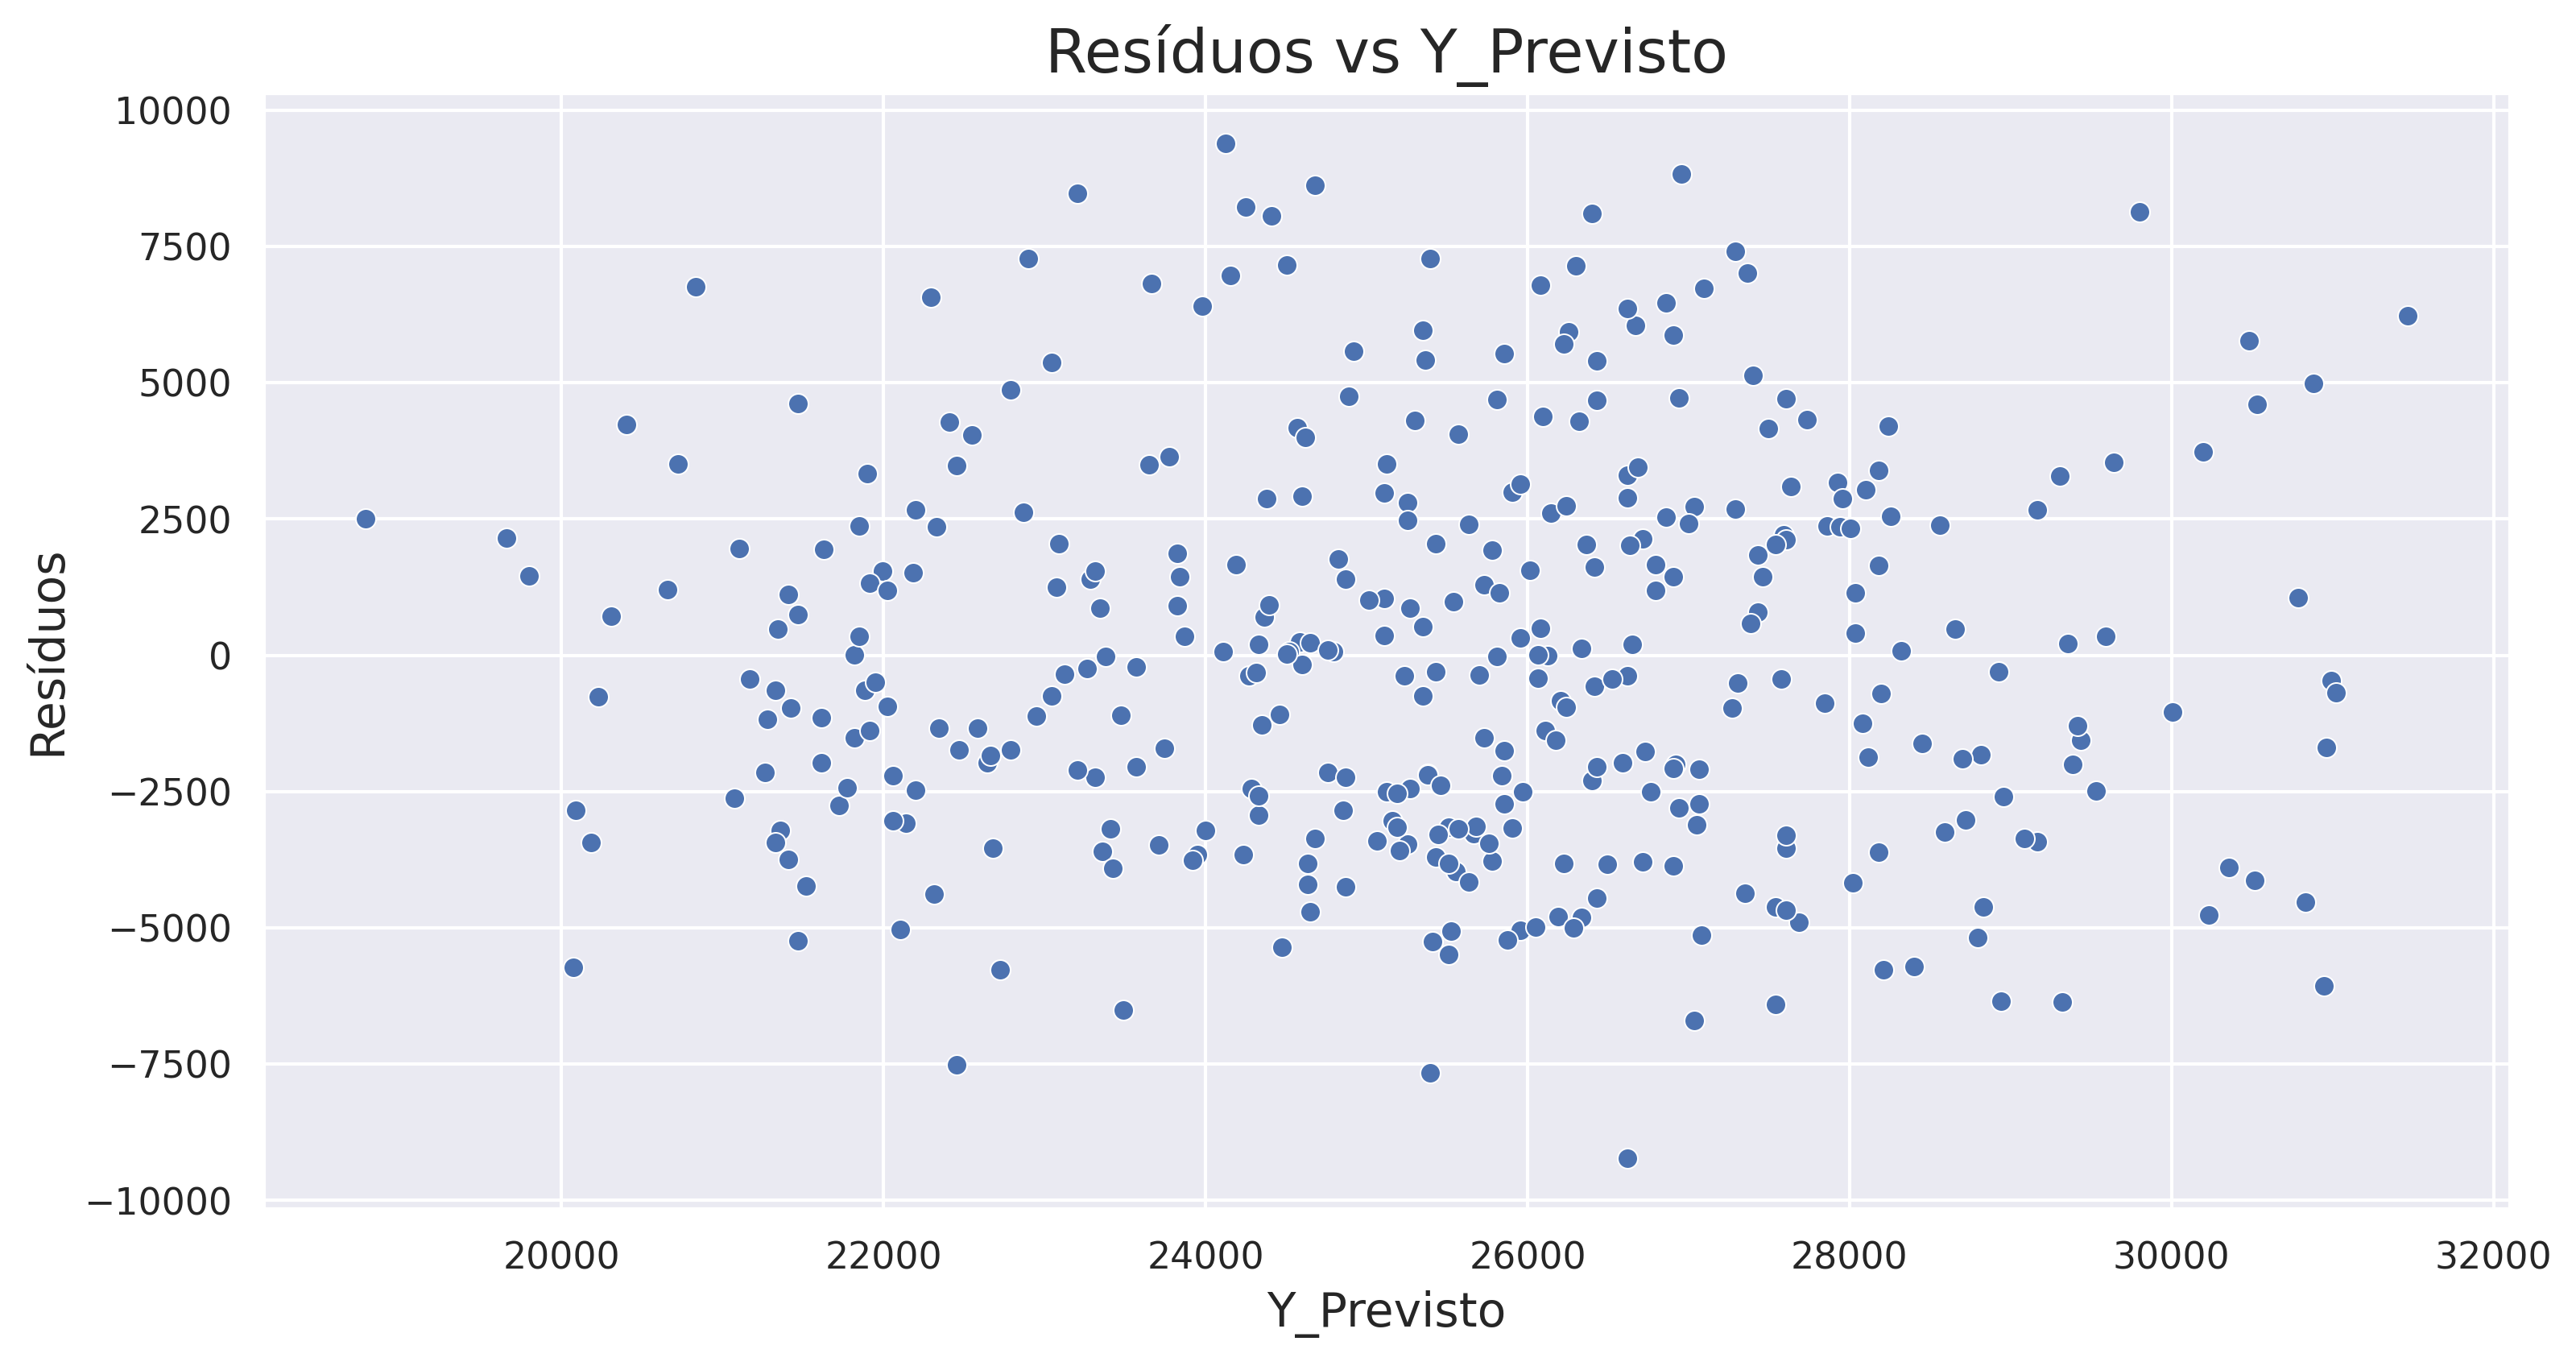

In [48]:
plt.figure(dpi=300)
ax = sns.scatterplot(x=data.Y_expected, y=data.Residual)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

### Obtenha o QQPlot dos resíduos

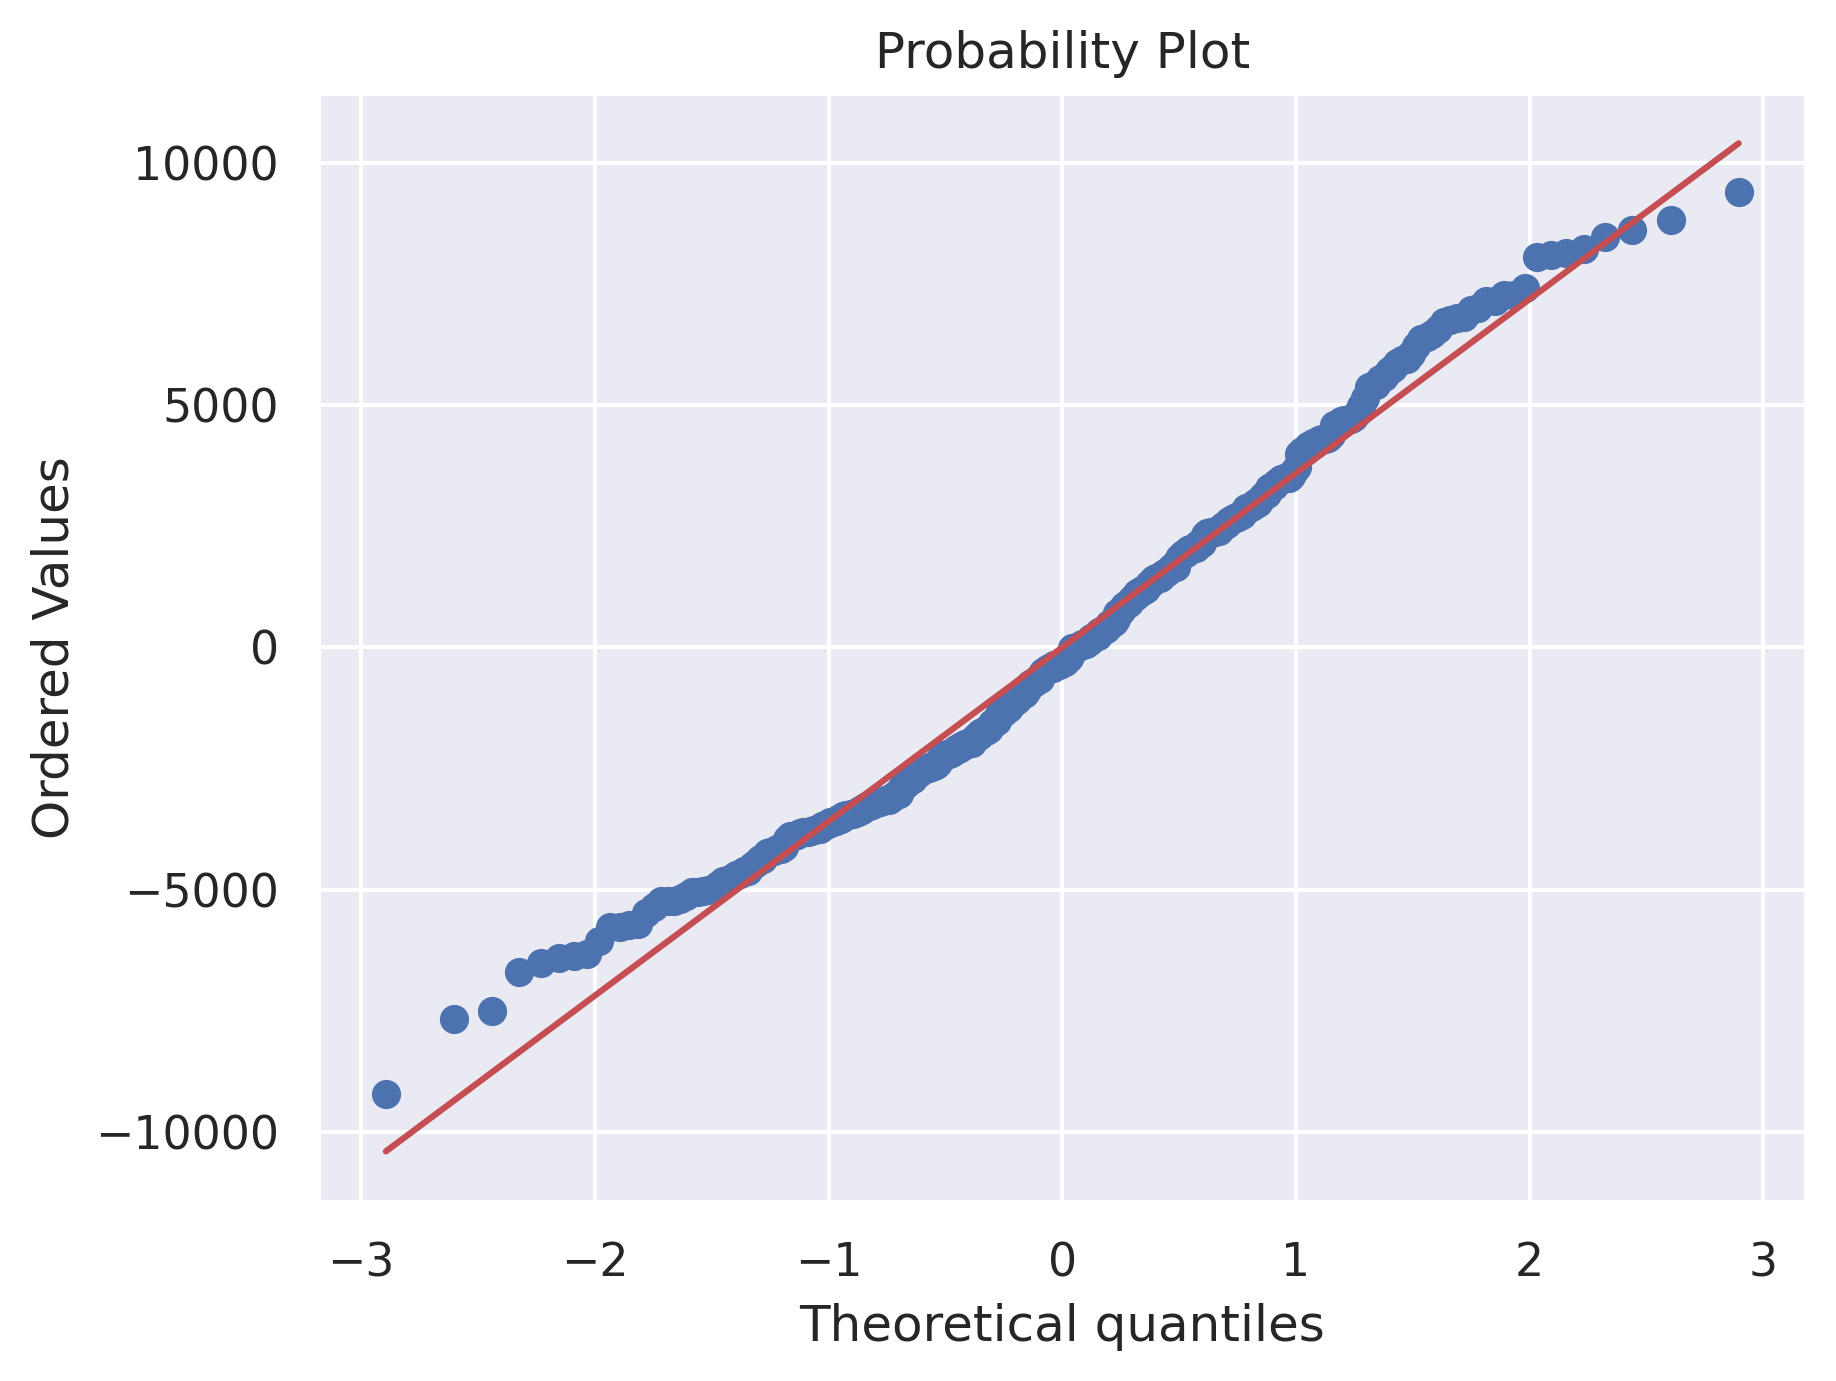

In [50]:
plt.figure(dpi=300)
(_, (_, _, _)) = probplot(data.Residual, plot=plt)
plt.show()

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [51]:
R2 = result_regression.ess / data.Y.apply(lambda y: (y - data['Y'].mean()) ** 2).sum()
R2

0.3301820493324323

In [52]:
result_regression.rsquared

0.33018204933243234